In [118]:
import library as l

import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import datetime
import os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
'''#loadstring = 'seed_1519_size_20000_topsize_300_date_2018-04-12'
loadstring = 'seed_39169_size_40000_topsize_300_date_2018-04-12'

models = {}
for i, model in enumerate(['/LR_' + str(2001+x) + '.data' for x in range(14)]):
    models[i+1] = l.load_file(loadstring + model)

top_f = l.load_file(loadstring + '/top_f.data')
bot_f = l.load_file(loadstring + '/top_f.data')
CV = l.load_file(loadstring + '/CV_2001.data')
indices = l.load_file(loadstring + '/indices.data')
ratings = l.load_file(loadstring + '/ratings.data')
seen = l.load_file(loadstring + '/seen.data')
test_idx = l.load_file(loadstring + '/test_idx.data')
train_idx = l.load_file(loadstring + '/train_idx.data')
features = list(CV.get_feature_names())
print(len(features))'''

loadstring = []
loadstring.append('seed_1828_size_40000_topsize_300_date_2018-05-18')
loadstring.append('seed_16376_size_40000_topsize_300_date_2018-05-18')
loadstring.append('seed_23662_size_40000_topsize_300_date_2018-05-18')

loop = range(len(loadstring))

start_year = 2001
end_year = 2014

main = {}

for j, lstr in enumerate(loadstring):
    main[j] = {}

    main[j]['models'] = {}
    for i, model in enumerate(['/LR_' + str(start_year+x) + '.data' for x in range(end_year - start_year + 1)]):
        main[j]['models'][i+1] = l.load_file(lstr + model)

    main[j]['test_idx'] = {}
    for i, indx in enumerate(['/test_idx_' + str(start_year+x) + '.data' for x in range(end_year - start_year + 1)]):
        main[j]['test_idx'][i+1] = l.load_file(lstr + indx)

    main[j]['train_idx'] = {}
    for i, indx in enumerate(['/train_idx_' + str(start_year+x) + '.data' for x in range(end_year - start_year + 1)]):
        main[j]['train_idx'][i+1] = l.load_file(lstr + indx)

    main[j]['top_f'] = l.load_file(lstr + '/top_f.data')
    main[j]['bot_f'] = l.load_file(lstr + '/top_f.data')
    main[j]['CV'] = l.load_file(lstr + '/CV_2001.data')
    main[j]['indices'] = l.load_file(lstr + '/indices.data')
    main[j]['ratings'] = l.load_file(lstr + '/ratings.data')
    main[j]['seen'] = l.load_file(lstr + '/seen.data')
    main[j]['features'] = list(main[j]['CV'].get_feature_names())

In [3]:
from collections import defaultdict
import json

def load_previous_data(indices, file='aggressive_dedup.json'):
    data = defaultdict(list)
    time = defaultdict(list)
    #ratings = defaultdict(list)
    
    idx = sorted([item for sublist in indices.values() for item in sublist])
    x = sorted(list(indices.keys()))
    for yr in x:
        data[yr] = list(np.zeros(len(indices[yr])))
        time[yr] = list(np.zeros(len(indices[yr])))
        #ratings[yr] = list(np.zeros(len(indices[yr])))
    with open(file) as infile:
        i = 0
        for line in infile:
            if i == idx[0]:
                idx.pop(0)
                x = json.loads(line)
                yr = x['reviewTime'][-4:]
                j = indices[yr].index(i)
                data[yr][j] = x.get('reviewText')
                time[yr][j] = x.get('reviewTime')
                #ratings[yr][j] = int(x.get('overall'))    
            i += 1
            if len(idx) == 0:
                break
    
    return data, time#, ratings

In [4]:
for z in loop:
    main[z]['data'], main[z]['time'] = load_previous_data(main[z]['indices'])
    #l.simplify_ratings(main[z]['data'], main[z]['ratings'])

In [5]:
main[z]['data'].keys()

dict_keys(['2012', '2011', '2006', '2002', '2007', '2005', '2014', '2003', '2009', '2001', '2010', '2008', '2013', '2004'])

In [6]:
main[z]['ratings'].keys()

dict_keys(['2012', '2011', '2006', '2002', '2007', '2005', '2014', '2003', '2009', '2001', '2010', '2008', '2013', '2004'])

In [9]:
x = sorted(main[0]['models'].keys())

results = []


for i, each in enumerate(x[:4]):
    tempo = []
    for z in loop:
        temp = []
        '''        
        X_test = np.array(main[z]['data'][str(2000 + each)])[main[z]['test_idx'][each]]
        
        X_test = main[z]['CV'].transform(X_test)
        y_test = np.array(main[z]['ratings'][str(2000 + each)])[main[z]['test_idx'][each]]
        
        temp.append(main[z]['models'][each].score(X_test, y_test))

        print('Trained on: ' + str(2000 + each) + '  Scored on: ' + str(2000 + each) + '    acc: ', temp[-1])'''
        
        for every in x[-3:]:
            
            X_test = np.array(main[z]['data'][str(2000 + every)])[main[z]['test_idx'][every]]
            
            X_test = main[z]['CV'].transform(X_test)
            y_test = np.array(main[z]['ratings'][str(2000 + every)])[main[z]['test_idx'][every]]
            
            temp.append(main[z]['models'][each].score(X_test, y_test))
            
            print('Trained on: ' + str(2000 + each) + '  Scored on: ' + str(2000 + every) + '    acc: ', temp[-1])
        print()
        tempo.append(temp)
    results.append(tempo)
    if i == len(x) - 2:
        break

Trained on: 2001  Scored on: 2012    acc:  0.848625
Trained on: 2001  Scored on: 2013    acc:  0.845375
Trained on: 2001  Scored on: 2014    acc:  0.8435

Trained on: 2001  Scored on: 2012    acc:  0.84125
Trained on: 2001  Scored on: 2013    acc:  0.84425
Trained on: 2001  Scored on: 2014    acc:  0.840875

Trained on: 2001  Scored on: 2012    acc:  0.840375
Trained on: 2001  Scored on: 2013    acc:  0.8485
Trained on: 2001  Scored on: 2014    acc:  0.838625

Trained on: 2002  Scored on: 2012    acc:  0.8485
Trained on: 2002  Scored on: 2013    acc:  0.8465
Trained on: 2002  Scored on: 2014    acc:  0.842375

Trained on: 2002  Scored on: 2012    acc:  0.846125
Trained on: 2002  Scored on: 2013    acc:  0.8455
Trained on: 2002  Scored on: 2014    acc:  0.841

Trained on: 2002  Scored on: 2012    acc:  0.848125
Trained on: 2002  Scored on: 2013    acc:  0.85175
Trained on: 2002  Scored on: 2014    acc:  0.846375

Trained on: 2003  Scored on: 2012    acc:  0.850375
Trained on: 2003  Scor

In [62]:
x = sorted(main[0]['models'].keys())

results2 = []


for i, each in enumerate(x[7:11]):
    tempo = []
    for z in loop:
        temp = []
        '''        
        X_test = np.array(main[z]['data'][str(2000 + each)])[main[z]['test_idx'][each]]
        
        X_test = main[z]['CV'].transform(X_test)
        y_test = np.array(main[z]['ratings'][str(2000 + each)])[main[z]['test_idx'][each]]
        
        temp.append(main[z]['models'][each].score(X_test, y_test))

        print('Trained on: ' + str(2000 + each) + '  Scored on: ' + str(2000 + each) + '    acc: ', temp[-1])'''
        
        for every in x[-3:]:
            
            X_test = np.array(main[z]['data'][str(2000 + every)])[main[z]['test_idx'][every]]
            
            X_test = main[z]['CV'].transform(X_test)
            y_test = np.array(main[z]['ratings'][str(2000 + every)])[main[z]['test_idx'][every]]
            
            temp.append(main[z]['models'][each].score(X_test, y_test))
            
            print('Trained on: ' + str(2000 + each) + '  Scored on: ' + str(2000 + every) + '    acc: ', temp[-1])
        print()
        tempo.append(temp)
    results2.append(tempo)
    if i == len(x) - 2:
        break

Trained on: 2008  Scored on: 2012    acc:  0.85325
Trained on: 2008  Scored on: 2013    acc:  0.856625
Trained on: 2008  Scored on: 2014    acc:  0.85325

Trained on: 2008  Scored on: 2012    acc:  0.8535
Trained on: 2008  Scored on: 2013    acc:  0.8575
Trained on: 2008  Scored on: 2014    acc:  0.8565

Trained on: 2008  Scored on: 2012    acc:  0.849625
Trained on: 2008  Scored on: 2013    acc:  0.859
Trained on: 2008  Scored on: 2014    acc:  0.856625

Trained on: 2009  Scored on: 2012    acc:  0.858
Trained on: 2009  Scored on: 2013    acc:  0.854625
Trained on: 2009  Scored on: 2014    acc:  0.85525

Trained on: 2009  Scored on: 2012    acc:  0.857125
Trained on: 2009  Scored on: 2013    acc:  0.859625
Trained on: 2009  Scored on: 2014    acc:  0.855

Trained on: 2009  Scored on: 2012    acc:  0.84725
Trained on: 2009  Scored on: 2013    acc:  0.857875
Trained on: 2009  Scored on: 2014    acc:  0.857

Trained on: 2010  Scored on: 2012    acc:  0.854375
Trained on: 2010  Scored on:

In [12]:
#l.save_file('run_once_results.data', results)

In [10]:
#results = l.load_file('polarity_prediction_once_results.data')

In [78]:
averages = np.array(results).mean(axis=1)
averages2 = np.array(results2).mean(axis=1)

In [79]:
averages2 - averages

array([[0.00870833, 0.01166667, 0.01445833],
       [0.00654167, 0.00945833, 0.0125    ],
       [0.00958333, 0.01416667, 0.01625   ],
       [0.00958333, 0.01741667, 0.018375  ]])

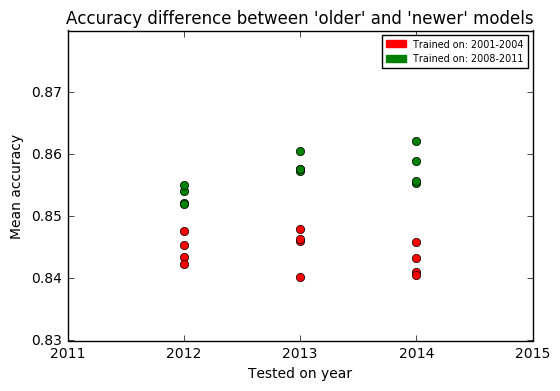

In [155]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([range(2012,2015) for x in range(4)], averages, 'ro')
ax.plot([range(2012,2015) for x in range(4)], averages2, 'go')

red_patch = mpatches.Patch(color='r', label='Trained on: 2001-2004')
green_patch = mpatches.Patch(color='g', label='Trained on: 2008-2011')
ax.legend(handles=[red_patch, green_patch], fontsize='x-small', loc='upper right')

ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(range(2011,2016))

ax.set_ylim(0.83,0.88)

plt.xlabel('Tested on year')
plt.ylabel('Mean accuracy')
plt.title('Accuracy difference between \'older\' and \'newer\' models')
plt.savefig('Accuracy_difference_of_old_and_new.jpeg', dpi=300)
plt.show()